## ディープラーニングのモデルを作ってみよう！～二値分類モデル

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tensorflow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
# scikit-learnからIrisのデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# setosaか、それ以外か
is_setosa = (dataset['species'] == 0).astype(np.int64)

# datasetに追加
dataset['is_setosa'] = is_setosa
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [5]:
# 目的変数（Y)：is_setosa、説明変数（X)：petal_widthとpetal_length
Y = np.array(dataset['is_setosa'])
X = np.array(dataset[['petal_width', 'petal_length']])

In [6]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (150,) , X= (150, 2)


In [7]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [8]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (73,) , X_train= (73, 2)
Y_valid= (32,) , X_valid= (32, 2)
Y_test= (45,) , X_test= (45, 2)


In [9]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(8, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

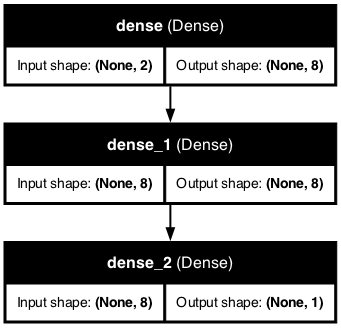

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=72)

In [10]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2603 - loss: 0.7865 - val_accuracy: 0.6250 - val_loss: 0.6829
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8219 - loss: 0.6646 - val_accuracy: 0.5312 - val_loss: 0.6428
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.5990 - val_accuracy: 0.5312 - val_loss: 0.6188
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.5561 - val_accuracy: 0.5312 - val_loss: 0.6019
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.5232 - val_accuracy: 0.5312 - val_loss: 0.5881
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.4947 - val_accuracy: 0.5312 - val_loss: 0.5771
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.4692 - val_accuracy: 0.5312 - val_loss: 0.5690
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7397 - loss: 0.4492 - val_accuracy: 0.5312 - val_los

Text(0, 0.5, 'crossentropy')

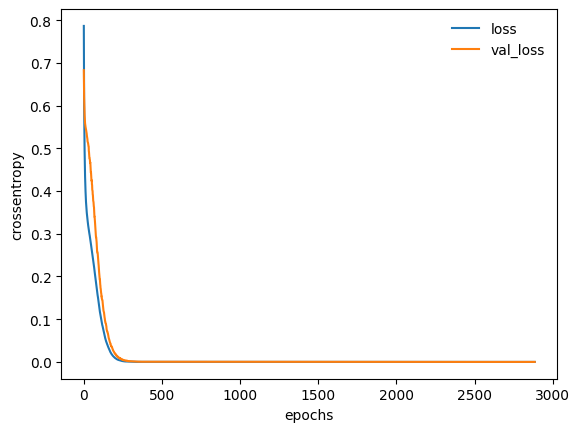

In [13]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [14]:
# predictで予測を行なう
Y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [15]:
# Y_predを表示
Y_pred

array([[1.0026032e-19],
       [3.5132018e-07],
       [9.9999869e-01],
       [2.5890629e-18],
       [9.9999899e-01],
       [2.6613976e-22],
       [9.9999708e-01],
       [6.3170899e-13],
       [2.4118257e-12],
       [7.4992679e-10],
       [4.9900269e-14],
       [1.6830359e-12],
       [1.6208192e-10],
       [1.0311094e-12],
       [3.9163256e-12],
       [9.9999923e-01],
       [1.6830359e-12],
       [6.9394462e-10],
       [9.9999750e-01],
       [9.9999183e-01],
       [1.1758853e-16],
       [1.6830359e-12],
       [9.9999756e-01],
       [9.9999869e-01],
       [4.0270110e-15],
       [9.9999607e-01],
       [9.9982554e-01],
       [1.7515708e-10],
       [1.2461201e-05],
       [9.9996221e-01],
       [1.3045389e-16],
       [1.6830359e-12],
       [9.9999899e-01],
       [2.4671427e-15],
       [1.8155623e-19],
       [1.8928704e-10],
       [9.9999255e-01],
       [1.9428656e-14],
       [7.3191722e-12],
       [4.9134727e-09],
       [1.3574257e-18],
       [9.999982

In [16]:
# 二値分類は予測結果の確率が0.5以下なら0,
# それより大きければ1となる計算で求める
Y_pred_cls = (Y_pred > 0.5).astype("int32")
Y_pred_cls

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [17]:
# 形状を正解（目的変数）に合わせる
Y_pred_ = Y_pred_cls.reshape(-1)

In [18]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## ディープラーニングのモデルを作ってみよう！～多クラス分類モデル

In [19]:
# データの前処理
# 目的変数をカテゴリー変数に展開する
dataset2 = pd.get_dummies(data=dataset, columns=['species'])
dataset2.head()

,sepal_length,sepal_width,petal_length,petal_width,is_setosa,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,1,True,False,False
1,4.9,3.0,1.4,0.2,1,True,False,False
2,4.7,3.2,1.3,0.2,1,True,False,False
3,4.6,3.1,1.5,0.2,1,True,False,False
4,5.0,3.6,1.4,0.2,1,True,False,False


In [20]:
# Y:目的変数、X:説明変数
Y = np.array(dataset2[['species_0', 'species_1', 'species_2']])
X = np.array(dataset2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [21]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [22]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルの構築。整数のベクトル値の予測の場合、lossを「categorical_crossentropy」とする
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

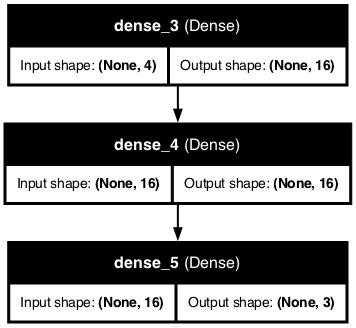

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=72)

In [24]:
# モデルの構造を表示
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3288 - loss: 2.0583 - val_accuracy: 0.2500 - val_loss: 1.6012
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3288 - loss: 1.6245 - val_accuracy: 0.2500 - val_loss: 1.3842
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3288 - loss: 1.3948 - val_accuracy: 0.2500 - val_loss: 1.2644
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3288 - loss: 1.2543 - val_accuracy: 0.2500 - val_loss: 1.1701
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3288 - loss: 1.1465 - val_accuracy: 0.2500 - val_loss: 1.1161
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3288 - loss: 1.0848 - val_accuracy: 0.2500 - val_loss: 1.0861
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3151 - loss: 1.0380 - val_accuracy: 0.2500 - val_loss: 1.0438
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2603 - loss: 0.9962 - val_accuracy: 0.2500 - val_

Text(0, 0.5, 'crossentropy')

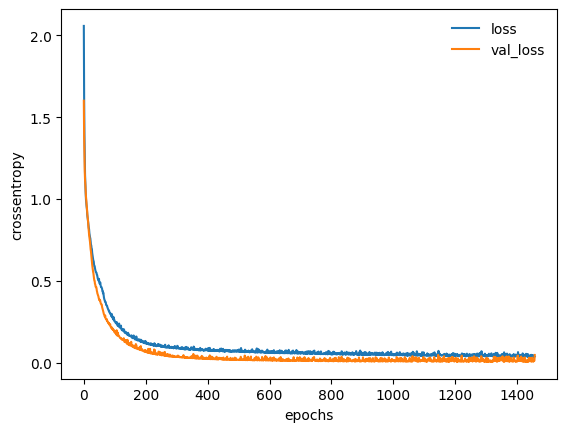

In [26]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [27]:
# predictで予測を行なう
Y_pred_0 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [28]:
# predictの結果
Y_pred_0

array([[1.81489268e-10, 9.28896861e-06, 9.99990702e-01],
       [1.12234329e-05, 9.99839723e-01, 1.49094209e-04],
       [1.00000000e+00, 8.16732015e-09, 4.00239508e-10],
       [1.58955654e-10, 2.60134606e-04, 9.99739826e-01],
       [9.99999166e-01, 7.89522232e-07, 1.33192302e-08],
       [4.51431996e-13, 6.08642239e-08, 9.99999881e-01],
       [9.99999642e-01, 3.53683134e-07, 7.46227169e-09],
       [2.86718478e-06, 9.99899328e-01, 9.78923345e-05],
       [1.93147935e-06, 9.99813318e-01, 1.84691016e-04],
       [1.17276486e-05, 9.99917924e-01, 7.04308040e-05],
       [6.06896711e-09, 1.66097318e-03, 9.98339057e-01],
       [5.14538851e-06, 9.99901235e-01, 9.36410652e-05],
       [3.86854890e-06, 9.99339461e-01, 6.56776479e-04],
       [3.45303738e-06, 9.99738276e-01, 2.58277491e-04],
       [4.46885952e-06, 9.98562038e-01, 1.43341650e-03],
       [9.99999881e-01, 1.39662816e-07, 5.57024382e-09],
       [6.33719537e-06, 9.99200106e-01, 7.93543702e-04],
       [1.07703590e-05, 9.97072

In [29]:
# 多クラス分類は予測結果の各リストにおける
# 最大値のインデックスを取得するようにする
Y_pred = np.argmax(Y_pred_0, axis=1)

In [28]:
# Y_predを表示
Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [30]:
# Y_testのカテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [31]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.92        18
           2       0.90      0.82      0.86        11

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



## 多クラス分類モデルで目的変数をそのまま扱う場合

In [32]:
# Y:目的変数、X:説明変数
# 目的変数はそのまま使う（整数のベクトル値を予測することになる）
Y = np.array(dataset['species'])
X = np.array(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [33]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [34]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルの構築。整数のベクトル値の予測の場合、lossを「sparse_categorical_crossentropy」とする
model.compile(optimizer = "rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
# モデルの構造を表示
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2603 - loss: 5.8040 - val_accuracy: 0.4688 - val_loss: 3.6842
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 4.9086 - val_accuracy: 0.4688 - val_loss: 3.2226
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 4.2915 - val_accuracy: 0.4688 - val_loss: 2.8493
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 3.7890 - val_accuracy: 0.4688 - val_loss: 2.5498
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2603 - loss: 3.3730 - val_accuracy: 0.4688 - val_loss: 2.3126
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 3.0302 - val_accuracy: 0.4688 - val_loss: 2.0734
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 2.6944 - val_accuracy: 0.4688 - val_loss: 1.8928
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2603 - loss: 2.4226 - val_accuracy: 0.4688 - val_los

Text(0, 0.5, 'crossentropy')

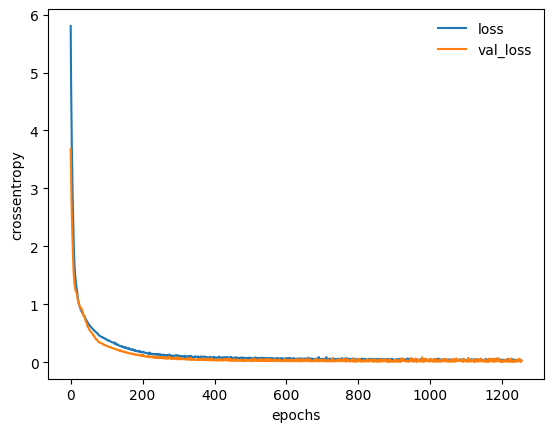

In [37]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [38]:
# predictで予測を行なう
Y_pred_0 = model.predict(X_test)

# 多クラス分類は予測結果の各リストにおける
# 最大値のインデックスを取得するようにする
Y_pred = np.argmax(Y_pred_0, axis=1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30e657c40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [39]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

